## Tugas Besar IF2220 Probabilitas dan Statistika
Anggota Kelompok:
- Christopher Jeffrey (13520055)
- Maria Khelli (13520115)

## Preparations

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", palette="tab10")

In [3]:
import scipy.stats as st

## Load Dataset

In [4]:
df = pd.read_csv('water_potability.csv', header=None)
df.columns = ["id", "pH", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "OrganicCarbon", "Trihalomethanes", "Turbidity", "Potability"]
df.columns = [s.lower() for s in df.columns]
df.head()

id         ph    hardness        solids  chloramines     sulfate  \
0   1   8.316766  214.373394  22018.417441     8.059332  356.886136   
1   2   9.092223  181.101509  17978.986339     6.546600  310.135738   
2   3   5.584087  188.313324  28748.687739     7.544869  326.678363   
3   4  10.223862  248.071735  28749.716544     7.513408  393.663396   
4   5   8.635849  203.361523  13672.091764     4.563009  303.309771   

   conductivity  organiccarbon  trihalomethanes  turbidity  potability  
0    363.266516      18.436524       100.341674   4.628771           0  
1    398.410813      11.558279        31.997993   4.075075           0  
2    280.467916       8.399735        54.917862   2.559708           0  
3    283.651634      13.789695        84.603556   2.672989           0  
4    474.607645      12.363817        62.798309   4.401425           0

## Descriptive Statistics - 1

Pada bagian ini, perhatikan bahwa std dan varians dihitung dari library Pandas. Maka, rumusnya adalah rumus std dan varians untuk populasi. Jika ingin menghitung std/varians sampel, harus dilakukan terlebih dahulu perkalian n/(n-1) pada varians. Namun, karena n = 2010, sehingga n/(n-1) mendekati 1, hasil dari library Pandas sudah dapat mewakili std/varians sampel. 

Dengan kata lain,
$$ \sigma \approx s $$
dan rasio n/(n-1) tidak lagi signifikan.

In [5]:
df.potability = df.potability.astype('object') # Karena kategorikal, diganti saja. tujuannya biar tidak muncul waktu di-describe
df.dtypes

id                   int64
ph                 float64
hardness           float64
solids             float64
chloramines        float64
sulfate            float64
conductivity       float64
organiccarbon      float64
trihalomethanes    float64
turbidity          float64
potability          object
dtype: object

In [6]:
df_desc = df.describe()[df.columns[1:-1]].T
df_desc["range"] = df_desc["max"] - df_desc["min"]
df_desc["IQR"] = df_desc["75%"] - df_desc["25%"]
df_desc["var"] = df_desc.apply(lambda x: df[x.name].var(), axis=1)
df_desc["skew"] = df_desc.apply(lambda x: df[x.name].skew(), axis=1)
df_desc["kurtosis"] = df_desc.apply(lambda x: df[x.name].kurtosis(), axis=1)
df_desc["median"] = df_desc.apply(lambda x: df[x.name].median(), axis=1)

In [7]:
df_desc = df_desc[["mean", "median", "std", "var", "range", "min", "max", "25%", "50%", "75%", "IQR", "skew", "kurtosis"]]
df_desc.rename(columns={"25%" : "Q1", "50%" : "Q2", "75%" : "Q3"}, inplace=True)
df_desc

mean        median          std           var  \
ph                   7.087193      7.029490     1.572803  2.473709e+00   
hardness           195.969209    197.203525    32.643166  1.065576e+03   
solids           21904.673439  20926.882155  8625.397911  7.439749e+07   
chloramines          7.134322      7.142014     1.585214  2.512904e+00   
sulfate            333.211376    332.214113    41.211111  1.698356e+03   
conductivity       426.476708    423.438372    80.701872  6.512792e+03   
organiccarbon       14.357940     14.323286     3.325770  1.106075e+01   
trihalomethanes     66.400717     66.482041    16.081109  2.586021e+02   
turbidity            3.969497      3.967374     0.780471  6.091350e-01   

                        range         min           max            Q1  \
ph                  13.772501    0.227499     14.000000      6.090785   
hardness           243.845890   73.492234    317.338124    176.740657   
solids           56167.729801  320.942611  56488.672413  15614.412962   
chloramines         11.736129    1.390871     13.127000      6.138326   
sulfate            352.030642  129.000000    481.030642    307.626986   
conductivity       551.722883  201.619737    753.342620    366.619219   
organiccarbon       24.806707    2.200000     27.006707     12.122530   
trihalomethanes    115.422987    8.577013    124.000000     55.949993   
turbidity            5.044749    1.450000      6.494749      3.442882   

                           Q2            Q3           IQR      skew  kurtosis  
ph                   7.029490      8.053006      1.962221  0.048535  0.626904  
hardness           197.203525    216.447589     39.706932 -0.085321  0.525480  
solids           20926.882155  27170.534649  11556.121687  0.591011  0.337320  
chloramines          7.142014      8.109933      1.971607  0.013003  0.549782  
sulfate            332.214113    359.268147     51.641161 -0.045728  0.786854  
conductivity       423.438372    482.209772    115.590553  0.268012 -0.237206  
organiccarbon       14.323286     16.683562      4.561031 -0.020220  0.031018  
trihalomethanes     66.482041     77.294613     21.344620 -0.051383  0.223017  
turbidity            3.967374      4.514663      1.071781 -0.032266 -0.049831

Untuk menghitung modus dari kolom, kami melakukan binning terlebih dahulu pada kolom numerik kontinu. Maka dari itu, modus yang didapat adalah modus dalam bentuk interval. Jika ingin nilai atau intervalnya semakin kecil, perbesar nilai bins. Sebaliknya, jika ingin intervalnya semakin besar, perkecil nilai bins. 

Hati-hati saat mengatur nilai bins. Jika distribusi count modus menjadi uniform (semua interval memiliki nilai yang relatif sama, misal 1), maka perhitungan modus dengan metode ini akan sia-sia saja.

In [8]:
bins = 100
modes = []
for col in df.select_dtypes(include="float64"):
    mode = pd.cut(df[col], bins=bins).mode()[0]
    modes.append(mode)
modes.append(df.potability.mode()[0])

df_mode = pd.DataFrame(index=df.columns[1:])
df_mode["mode"] = modes
df_mode

mode
ph                       (6.838, 6.976]
hardness             (195.415, 197.854]
solids           (19979.648, 20541.325]
chloramines              (7.611, 7.728]
sulfate              (326.137, 329.657]
conductivity         (444.378, 449.895]
organiccarbon          (14.107, 14.355]
trihalomethanes        (59.363, 60.517]
turbidity                 (3.72, 3.771]
potability                            0

## Histogram, Boxplot Visualization, and Normality Test - 2 & 3

In [9]:
def draw_boxplot(data, color, edge_color, ax, is_vertical=True):
    bplot = ax.boxplot(notch=True,
                        vert=is_vertical, 
                        patch_artist=True,  
                        x=data) 

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bplot[element], color=edge_color)

    for patch in bplot['boxes']:
        patch.set_facecolor(color)    

    ax.set_ylim(0)
    return bplot

def draw_boxhist(col):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
    f.tight_layout()
    draw_boxplot(df[col], "lightblue", "blue", ax[0])
    sns.histplot(data=df[col], ax=ax[1], kde=True, fill=False)
    plt.show()

In [10]:
def shap_test(col):
    pval = st.shapiro(df[col]).pvalue
    if pval >= 0.05:
        print("Column", col, "is normally distributed")
    else:
        print("Column", col, "is not normally distributed")

def print_skew_kurt(col):
    print("Skew =", df_desc.loc[col]["skew"])
    print("Kurtosis =", df_desc.loc[col]["kurtosis"])

def normal_info(col):
    draw_boxhist(col)
    shap_test(col)
    print_skew_kurt(col)

### PH

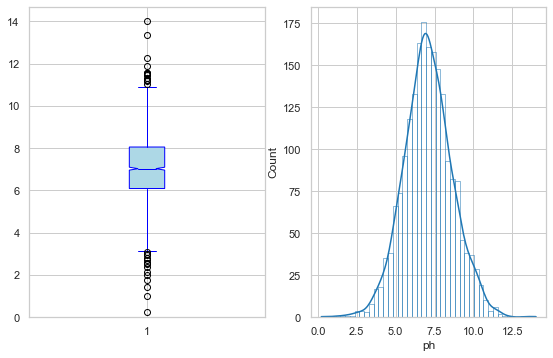

Column ph is not normally distributed
Skew = 0.04853451405270669
Kurtosis = 0.6269041256617065


In [11]:
normal_info("ph")

Perhatikan bahwa data memiliki bentuk yang leptokurtik. Dapat dilihat pada grafik histogram, data memiliki heavy tails pada kiri dan kanan distribusi. Hal ini didukung dengan grafik boxplot yang menunjukkan banyaknya pencilan pada kiri dan kanan distribusi data (heavy-tailed). 

Meski datanya non-skewed (skew mendekati nol), grafik tetap dikategorikan sebagai non-normal karena tidak mesokurtik.

### Hardness

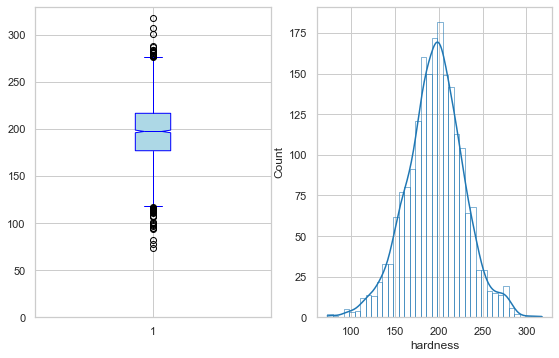

Column hardness is not normally distributed
Skew = -0.08532104172868622
Kurtosis = 0.5254804942991402


In [12]:
normal_info("hardness")

Data memiliki bentuk yang leptokurtik. Dapat dilihat pada grafik histogram, data memiliki heavy tails pada kiri dan kanan distribusi. Hal ini didukung dengan grafik boxplot yang menunjukkan banyaknya pencilan pada kiri dan kanan distribusi data (heavy-tailed). 

Meski datanya non-skewed (skew mendekati nol), grafik tetap dikategorikan sebagai non-normal karena tidak mesokurtik.

### Solids

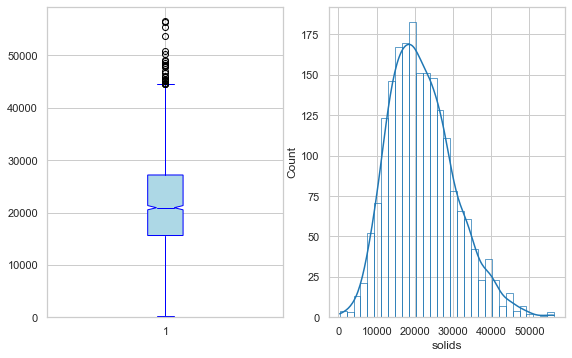

Column solids is not normally distributed
Skew = 0.5910113724580447
Kurtosis = 0.33732026745944976


In [13]:
normal_info("solids")

Perhatikan bahwa data memiliki skewness yang cukup besar sehingga data dapat dikategorikan sebagai data yang positively skewed. Hal ini dapat dilihat juga pada bagian boxplot, yaitu data memiliki banyak pencilan pada bagian positif. Pada histogram, puncak distribusi data juga mengarah ke kanan. 

Karena data positive-skewed, kolom ini tidak memiliki distribusi yang normal.

### Chloramines

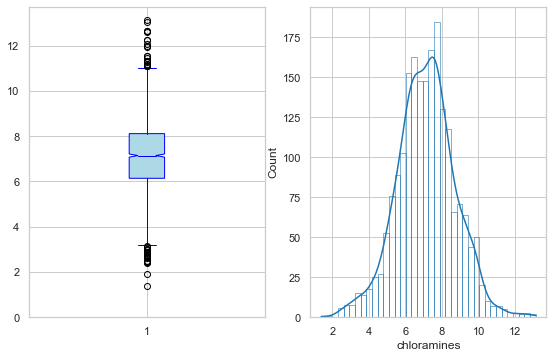

Column chloramines is not normally distributed
Skew = 0.013003497779569528
Kurtosis = 0.5497821097667472


In [14]:
normal_info("chloramines")

Pada data ini, skew data cukup kecil (skew mendekati nol). Hal ini juga dibuktikan dalam grafik histogram, yaitu puncak distribusi data yang berada di tengah. 

Namun, data ini tidak berdistribusi normal karena heavy-tailed ke kiri dan kanan sehingga berbentuk leptokurutik. Kesimpulan ini dapat dibuktikan dengan nilai kurtosis yang tinggi dan boxplot yang menunjukkan banyak pencilan di kiri dan kanan data (atas dan bawah jika vertikal).

### Sulfate

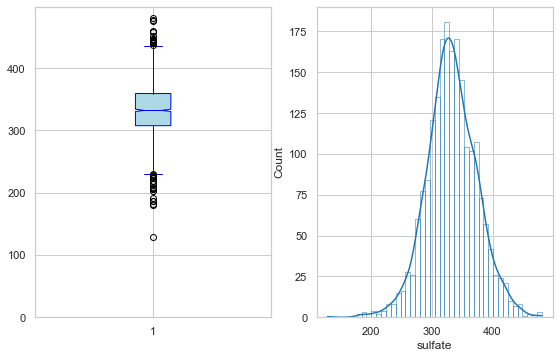

Column sulfate is not normally distributed
Skew = -0.04572780443653543
Kurtosis = 0.7868544988131605


In [15]:
normal_info("sulfate")

Sama seperti kolom-kolom sebelumnya, jika dilihat dari boxplot, distribusi sampel ini memiliki bentuk yang leptokurtik karena memiliki banyak pencilan di kiri dan kanan. Hal ini juga dibuktikan dengan nilai kurtosis yang cukup jauh dari nol.

Meski datanya non-skewed, distribusi sampel ini dikatakan tidak berdistribusi normal.

### Conductivity

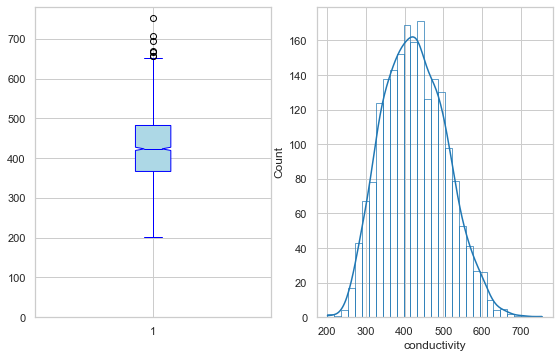

Column conductivity is not normally distributed
Skew = 0.26801233302645316
Kurtosis = -0.23720600574806516


In [16]:
normal_info("conductivity")

Pada atribut ini, dapat dilihat bahwa data memiliki pencilan ke arah positif sehingga dapat dikatakan data positive-skewed. Data ini juga dapat dikatakan platykurtik karena nilai kurtosis yang cukup jauh dari nol dan negatif. Dapat dilihat juga pada histogram plot, puncaknya cukup lebar (platykurtik).

Karena itu, data dikatakan tidak berdistribusi normal.

### OrganicCarbon

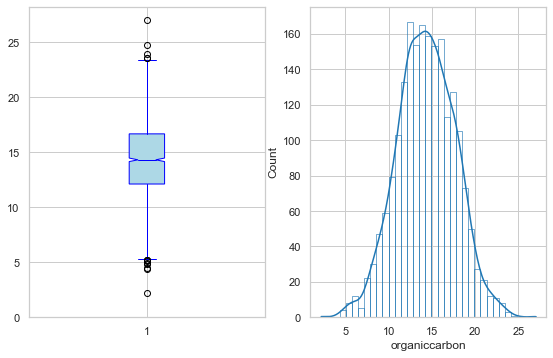

Column organiccarbon is normally distributed
Skew = -0.02021975629181238
Kurtosis = 0.031018388192253


In [17]:
normal_info("organiccarbon")

Berbeda dengan atribut-atribut sebelumnya, data ini dikategorikan sebagai data yang berdistribusi normal karena memiliki pencilan kiri dan kanan yang relatif lebih sedikit. Kemudian, dapat dilihat pada histogram plot, bentuk kurvanya adalah mesokurtik. Selain itu, nilai skew dan kurtosis mendekati nol.

Berdasarkan informasi yang ada, dapat disimpulkan bahwa atribut ini berdistribusi normal.

### Trihalomethanes

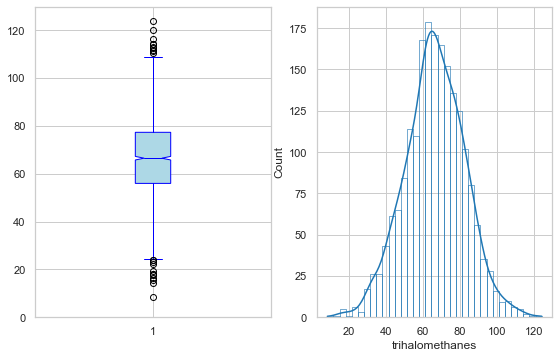

Column trihalomethanes is normally distributed
Skew = -0.05138268451619478
Kurtosis = 0.2230167810639787


In [18]:
normal_info("trihalomethanes")

Data ini memiliki nilai skew yang mendekati nol, berarti data tidak skewed. Data ini juga tidak terlihat memiliki banyak pencilan menurut histogram plot (bagian kiri dan kanan tidak terlalu landai). 

Maka dari itu, disimpulkan bahwa data ini berdistribusi normal.

### Turbidity

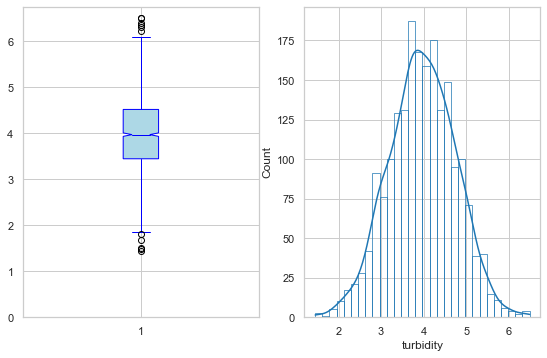

Column turbidity is normally distributed
Skew = -0.03226597968019271
Kurtosis = -0.049830796949249745


In [19]:
normal_info("turbidity")

Perhatikan bahwa data memiliki pencilan yang tidak cukup banyak. Bagian kiri dan kanan histogram plot tidak terlalu landai. Kemudian, puncak dari histplot juga tidak terlalu lancip dan terlalu lebar. Selain itu, nilai skew dan kurtosis mendekati nol. 

Maka dari itu, disimpulkan bahwa kolom ini berdistribusi normal.

## Hypothesis 1 Test - 4

Pada dataset ini **(khususnya bagian 4A, 4B, dan 4C)**, digunakan t-test untuk melakukan uji hipotesis. T-test digunakan karena **data** yang tertera **merupakan data sampel**, bukan data populasi sehingga sebenarnya **variansi populasi tidak diketahui**.

In [20]:
def compute_t_one(xbar, mu_0, std, n):
    return (xbar - mu_0)/(std/np.sqrt(n))

### Bagian A: Rata-rata pH di atas 7

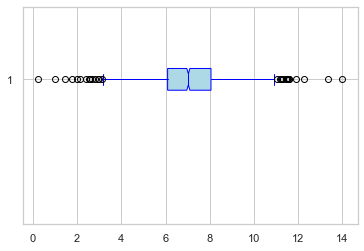

In [21]:
draw_boxplot(df["ph"], "lightblue", "blue", plt.subplot(), False)
plt.show()

Hipotesis
$$ ^1H_0: \mu = 7 $$
$$ ^2H_1: \mu > 7 $$
dengan tingkat signifikansi
$$ ^3\alpha = 0.05 $$
dan daerah kritis 
$$ ^4t > 1.645; \enspace v = \infty $$ 
dengan
$$ t = \frac{\bar x - \mu_0}{s/\sqrt{n}} $$ 

In [22]:
mu_0 = 7; n = df.shape[0]

std = df_desc.loc["ph"]["std"]
xbar = df_desc.loc["ph"]["mean"]
tscore = compute_t_one(xbar, mu_0, std, n)

print("5.a) T-score =", tscore)
print("5.b) P-value =", 1 - st.norm.cdf(tscore))

5.a) T-score = 2.485445147379887
5.b) P-value = 0.006469476288896492


**Kesimpulan**: karena p-value < 0.05 dan t > 1.645, hipotesis nol ditolak. Nilai rata-rata pH lebih dari 7.

### Bagian B: Rata-rata hardness tidak sama dengan 205

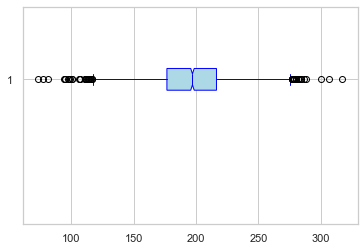

In [23]:
draw_boxplot(df["hardness"], "lightblue", "blue", plt.subplot(), False)
plt.show()

Hipotesis
$$ ^1H_0: \mu = 205 $$
$$ ^2H_1: \mu \neq 205 $$ 
dengan tingkat signifikan
$$ ^3\alpha = 0.05  $$  
dan daerah kritisnya adalah
$$ ^4t < -1.96 \enspace or \enspace t > 1.96; \enspace v = \infty $$ 
dengan
$$ t = \frac{\bar x - \mu_0}{s/\sqrt{n}} $$ 

In [24]:
mu_0 = 205; n = df.shape[0]

std = df_desc.loc["hardness"]["std"]
xbar = df_desc.loc["hardness"]["mean"]
tscore = compute_t_one(xbar, mu_0, std, n)

print("5.a) T-score =", tscore)
print("5.b) P-value =", np.round(2 * st.norm.cdf(tscore), 2))

5.a) T-score = -12.403137170010732
5.b) P-value = 0.0


**Kesimpulan**: karena p-value < 0.05 dan t < -1.96, hipotesis nol ditolak. Nilai rata-rata hardness tidak sama dengan 205.

### Bagian C: Nilai rata-rata 100 baris pertama kolom Solids bukan 21900

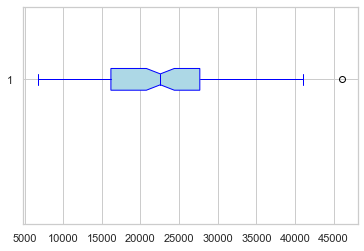

In [25]:
draw_boxplot(df["solids"].iloc[:100], "lightblue", "blue", plt.subplot(), False)
plt.show()

Hipotesis
$$ ^1H_0: \mu = 21900 $$
$$ ^2H_1: \mu \neq 21900 $$
dengan tingkat signifikan
$$ ^3\alpha = 0.05  $$  
dan daerah kritisnya adalah
$$ ^4t < -1.984 \enspace or \enspace t > 1.984; \enspace v = 99 $$ 
dengan
$$ t = \frac{\bar x - \mu_0}{s/\sqrt{n}} $$ 

In [26]:
mu_0 = 21900; n = 100

std = df["solids"].iloc[:100].std()
xbar = df["solids"].iloc[:100].mean()
tscore = compute_t_one(xbar, mu_0, std, n)

print("5.a) T-score =", tscore)
print("5.b) P-value =", 2*(1 - st.norm.cdf(tscore)))

5.a) T-score = 0.5636797715721551
5.b) P-value = 0.5729720864655174


**Kesimpulan**: Karena p-value > 0.05 dan -1.984 < t < 1.984, hipotesis nol tidak ditolak. Gagal membuktikan bahwa rata-rata 100 baris pertama kolom solid adalah bukan 21900.

### Bagian D: Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%?

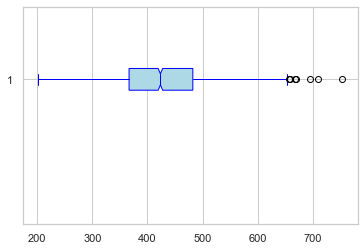

In [27]:
draw_boxplot(df["conductivity"], "lightblue", "blue", plt.subplot(), False)
plt.show()

Hipotesis
$$ ^1H_0: p_0 = 0.1 $$
$$ ^2H_1: p_0 \neq 0.1 $$ 
dengan tingkat signifikan
$$ ^3\alpha = 0.05  $$  
dan uji statistiknya adalah binomial acak
$$ ^4 X $$ 
serta daerah kritisnya (didekati dengan Z) 
$$ ^4z < -1.96 \enspace or \enspace z > 1.96 $$
P-value binomial yang dihitung adalah
$$ P = 2P(X \ge \enspace 745 \enspace|\enspace p = 0.1) $$

In [28]:
# Sampel menunjukkan bahwa proporsi yang lebih dari 450 adalah 745
x = sum(df.conductivity.apply(lambda x: 1 if x > 450 else 0)) 
p_0 = 0.1; n = df.shape[0]

mu = n*p_0; std = np.sqrt(mu*(1-p_0))
zscore = ((x - 0.5) - mu)/std # correction factor

# mu = 201, berarti x > np_0(mu)
print("5.a) Z-score =", zscore)
print("5.b) P-value =", 2*(1 - st.norm.cdf(zscore)))

5.a) Z-score = 40.409201153527206
5.b) P-value = 0.0


**Kesimpulan**: Karena p-value < 0.05 dan z > 1.96, hipotesis nol ditolak. Proporsi nilai conductivity yang lebih dari 450 adalah tidak sama dengan 0.1.

### Bagian E: Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%

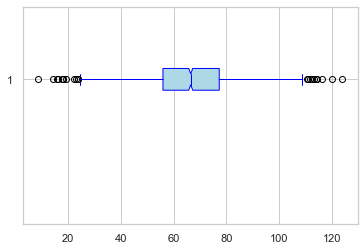

In [29]:
draw_boxplot(df["trihalomethanes"], "lightblue", "blue", plt.subplot(), False)
plt.show()

Hipotesis
$$ ^1H_0: p_0 = 0.05 $$ 
$$ ^2H_1: p_0 < 0.05 $$ 
dengan tingkat signifikan
$$ ^3\alpha = 0.05  $$  
dan uji statistiknya adalah binomial acak
$$ ^4 X $$ 
serta daerah kritisnya (didekati dengan Z) 
$$ ^4z < -1.645 $$

P-value binomial yang dihitung adalah
$$ P = P(X \le \enspace 106 \enspace | \enspace p = 0.05) $$

In [30]:
# Sampel menunjukkan bahwa proporsi yang kurang dari 40 adalah 106
x = sum(df.trihalomethanes.apply(lambda x: 1 if x < 40 else 0))
p_0 = 0.05; n = df.shape[0]

mu = n*p_0; std = np.sqrt(mu*(1-p_0))
zscore = ((x + 0.5) - mu)/std # correction factor

print("5.a) Z-score =", zscore)
print("5.b) P-value =", st.norm.cdf(zscore))

5.a) Z-score = 0.6140537909095591
5.b) P-value = 0.7304101088817901


**Kesimpulan**: Karena p-value > 0.05 dan z > -1.645, hipotesis nol tidak ditolak. Gagal membuktikan bahwa proporsi nilai trihalomethanes yang kurang dari 40 adalah kurang dari 0.05.

## Hypothesis 2 Test - 5

Helper function for unknown variance but equal

In [31]:
def compute_t_two(x1, x2, d0, sp, n1, n2):
    numer = (x1 - x2) - d0 
    denom = sp*(np.sqrt(1/n1 + 1/n2))
    return numer/denom

def compute_sp(var1, var2, n1, n2):
    sp_squared = ((var1)*(n1 - 1) + (var2)*(n2-1))/(n1 + n2 - 2)
    return np.sqrt(sp_squared)

Helper function for unknown variance but unequal

In [32]:
def compute_tAcc_two(x1, x2, d0, var1, var2, n1, n2):
    numer = (x1 - x2) - d0 
    denom = np.sqrt(var1/n1 + var2/n2)
    return numer/denom

def compute_v(var1, var2, n1, n2):
    numer = (var1/n1 + var2/n2)**2
    denom = (var1/n1)**2 /(n1 - 1) + (var2/n2)**2 / (n2-1)
    return numer/denom

### Bagian A: Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama

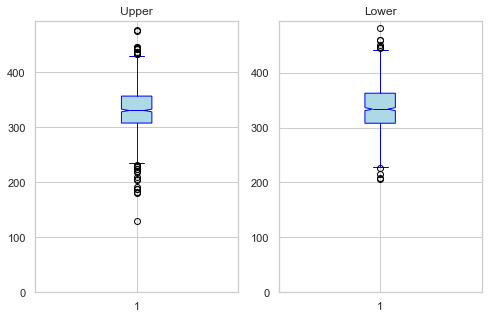

In [33]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
draw_boxplot(df.sulfate.iloc[:1005], "lightblue", "blue", ax[0])
draw_boxplot(df.sulfate.iloc[1005:], "lightblue", "blue", ax[1])
ax[0].set_title("Upper")
ax[1].set_title("Lower")
plt.show()

**Remark**: Berdasarkan boxplot, kedua sampel terlihat memiliki variansi yang sama. Maka dari itu, diasumsikan bahwa kedua variansi populasi adalah sama sehingga kami menggunakan metode unknown but equal variances.

Hipotesis
$$ ^1H_0: \mu_1 = \mu_2 $$
$$ ^2H_1: \mu_1 \neq \mu_2 $$ 
dengan tingkat signifikan
$$ ^3\alpha = 0.05 $$  
dan daerah kritisnya adalah
$$ ^4t < -1.96 \enspace or \enspace t > 1.96; \enspace v = \infty $$ 
dengan
$$ t = \frac{(\bar x_1 - \bar x_2) - d_0}{s_p\sqrt{1/n_1 + 1/n_2}} $$ 
dan
$$ s_p^2 = \frac{s_1^2(n_1 -1) + s_2^2(n_2-1)}{n_1+n_2-2} $$

In [34]:
n = df.shape[0] // 2 
upper = df.sulfate.iloc[:n]
lower = df.sulfate.iloc[n:]

xbar_1 = upper.mean(); xbar_2 = lower.mean()
var_1 = upper.var(); var_2 = lower.var()

sp = compute_sp(var_1, var_2, n, n) 
tscore = compute_t_two(xbar_1, xbar_2, 0, sp, n, n)

print("5.a) T-score =", tscore)
print("5.b) P-value =", 2*st.norm.cdf(tscore))

5.a) T-score = -2.0752690696871983
5.b) P-value = 0.0379616043851286


**Kesimpulan**: Karena p-value < 0.05 dan t < -1.96, hipotesis nol ditolak. Mean kelompok 1 berbeda dengan mean kelompok 2.

### Bagian B: Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15

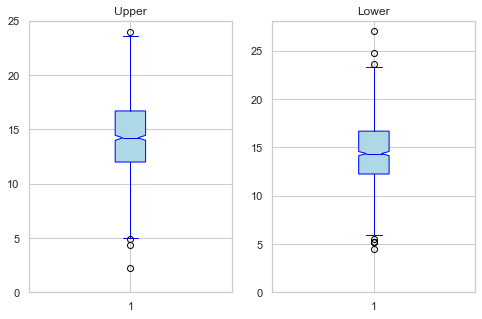

In [35]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
draw_boxplot(df.organiccarbon.iloc[:1005], "lightblue", "blue", ax[0])
draw_boxplot(df.organiccarbon.iloc[1005:], "lightblue", "blue", ax[1])
ax[0].set_title("Upper")
ax[1].set_title("Lower")
plt.show()

**Remark**: Berdasarkan boxplot, kedua sampel terlihat memiliki variansi yang sama. Maka dari itu, diasumsikan bahwa kedua variansi populasi adalah sama sehingga kami menggunakan metode unknown but equal variances.

Hipotesis
$$ ^1H_0: \mu_1 - \mu_2  = 0.15 $$
$$ ^2H_1: \mu_1 - \mu_2 > 0.15 $$ 
dengan tingkat signifikan
$$ ^3\alpha = 0.05 $$  
dan daerah kritisnya adalah
$$ ^4t > 1.645; \enspace v = \infty $$ 
dengan
$$ t = \frac{(\bar x_1 - \bar x_2) - d_0}{s_p\sqrt{1/n_1 + 1/n_2}} $$ 
dan
$$ s_p^2 = \frac{s_1^2(n_1 -1) + s_2^2(n_2-1)}{n_1+n_2-2} $$

In [36]:
n = df.shape[0] // 2 
upper = df.organiccarbon.iloc[:n]
lower = df.organiccarbon.iloc[n:]

xbar_1 = upper.mean(); xbar_2 = lower.mean()
var_1 = upper.var(); var_2 = lower.var()

sp = compute_sp(var_1, var_2, n, n) 
tscore = compute_t_two(xbar_1, xbar_2, 0.15, sp, n, n)

print("5.a) T-score =", tscore)
print("5.b) P-value =", 1 - st.norm.cdf(tscore))

5.a) T-score = -2.413145517798807
5.b) P-value = 0.9920922480912


**Kesimpulan**: Karena p-value > 0.05 dan t < 1.645, hipotesis nol tidak ditolak. Gagal membuktikan bahwa rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15.

NB: Sebenarnya, jika diuji dengan two-tailed, hipotesis nol akan ditolak karena kenyataannya adalah bagian akhir yang lebih besar 0.15 daripada bagian awal. Namun, karena kita **hanya ingin membuktikan** apakah **bagian awal lebih besar 0.15 daripada bagian akhir**, hipotesis nol ditolak. Hal ini bergantung dengan apa yang ingin dibuktikan (dengan kata lain, bergantung H1).

### Bagian C: Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya

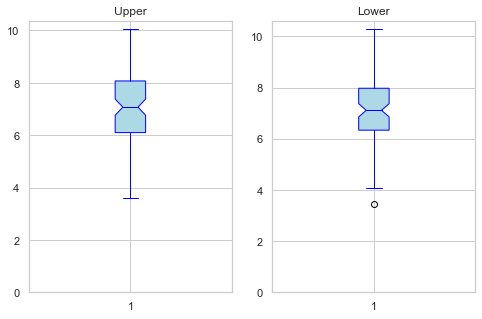

In [37]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
draw_boxplot(df.chloramines.iloc[:100], "lightblue", "blue", ax[0])
draw_boxplot(df.chloramines.iloc[df.shape[0] - 100:], "lightblue", "blue", ax[1])
ax[0].set_title("Upper")
ax[1].set_title("Lower")
plt.show()

**Remark**: Berdasarkan boxplot, kedua sampel terlihat memiliki variansi yang sama. Maka dari itu, diasumsikan bahwa kedua variansi populasi adalah sama sehingga kami menggunakan metode unknown but equal variances.

Hipotesis
$$ ^1H_0: \mu_1 = \mu_2 $$
$$ ^2H_1: \mu_1 \neq \mu_2 $$ 
dengan tingkat signifikan
$$ ^3\alpha = 0.05 $$  
dan daerah kritisnya adalah
$$ ^4t < -1.984 \enspace or \enspace t > 1.984; \enspace v = 99 $$ 
dengan
$$ t = \frac{(\bar x_1 - \bar x_2) - d_0}{s_p\sqrt{1/n_1 + 1/n_2}} $$ 
dan
$$ s_p^2 = \frac{s_1^2(n_1 -1) + s_2^2(n_2-1)}{n_1+n_2-2} $$

In [38]:
n = 100
upper = df.chloramines.iloc[:n]
lower = df.chloramines.iloc[df.shape[0] - n:]

xbar_1 = upper.mean(); xbar_2 = lower.mean()
var_1 = upper.var(); var_2 = lower.var()

sp = compute_sp(var_1, var_2, n, n) 
tscore = compute_t_two(xbar_1, xbar_2, 0.15, sp, n, n)

print("5.a) T-score =", tscore)
print("5.b) P-value =", 2*st.norm.cdf(tscore))

5.a) T-score = -1.4654206021109755
5.b) P-value = 0.1428061999400448


**Kesimpulan**: Karena p-value > 0.05 dan -1.984 < t < 1.984, hipotesis nol tidak ditolak. Gagal membuktikan bahwa rata-rata 100 baris pertama kolom chloramines sama dengan 100 baris terakhirnya.

### Bagian D: Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada proporsi nilai yang sama di bagian akhir Turbidity

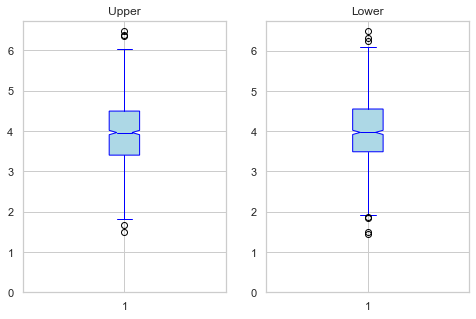

In [39]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
draw_boxplot(df.turbidity.iloc[:1005], "lightblue", "blue", ax[0])
draw_boxplot(df.turbidity.iloc[1005:], "lightblue", "blue", ax[1])
ax[0].set_title("Upper")
ax[1].set_title("Lower")
plt.show()

Hipotesis
$$ ^1H_0: p_1 = p_2 $$
$$ ^2H_1: p_1 > p_2 $$ 
dengan tingkat signifikan
$$ ^3\alpha = 0.05  $$  
dan daerah kritisnya adalah
$$ ^4z > 1.645 $$ 
dengan
$$ z = \frac{\hat p_1 - \hat p_2}{\sqrt{\hat p \hat q (1/n_1+1/n_2)}} $$

In [40]:
n = df.shape[0] // 2
x_1 = sum(df.turbidity.iloc[:n].apply(lambda x: 1 if x > 4 else 0))
x_2 = sum(df.turbidity.iloc[n:].apply(lambda x: 1 if x == 4 else 0))

p_1 = x_1/n; p_2 = x_2/n
p = (x_1 + x_2) / (2*n)
zscore = (p_1 - p_2)/np.sqrt(p*(1-p)*(1/n+1/n))

print("5.a) Z-score =", zscore)
print("5.b) P-value =", (1 - st.norm.cdf(zscore)))

5.a) Z-score = 25.31766679551068
5.b) P-value = 0.0


**Kesimpulan**: Karena p-value < 0.05 dan z > 1.645 , hipotesis nol ditolak. Proporsi kelompok pertama lebih besar daripada proporsi kelompok kedua.

### Bagian E: Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya

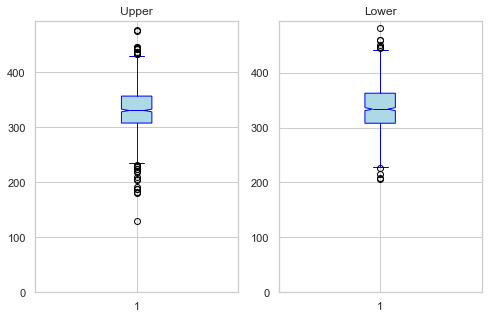

In [41]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
draw_boxplot(df.sulfate.iloc[:1005], "lightblue", "blue", ax[0])
draw_boxplot(df.sulfate.iloc[1005:], "lightblue", "blue", ax[1])
ax[0].set_title("Upper")
ax[1].set_title("Lower")
plt.show()

Hipotesis
$$ ^1H_0: \sigma_1^2 = \sigma_2^2 $$
$$ ^2H_1: \sigma_1^2 \neq \sigma_2^2 $$ 
dengan tingkat signifikan
$$ ^3\alpha = 0.05 \newline $$  
dan daerah kritisnya adalah
$$ ^4 f < 0.884 \enspace or f > 1.132 $$ 
dengan
$$ f = \frac{s_1^2}{s_2^2} $$

In [42]:
n = df.shape[0] // 2
var_1 = df.sulfate.iloc[:n].var()
var_2 = df.sulfate.iloc[n:].var()
fscore = var_1/var_2

left_tail = st.f.cdf(fscore, n-1, n-1)
right_tail = 1 - left_tail

print("5.a) F-score =", fscore)
# P = P(2 x area yang lebih kecil antara left tail dan right tail)
print("5.b) P-value =", 2*min(left_tail, right_tail)) 


5.a) F-score = 1.0152511043950063
5.b) P-value = 0.8105332960349165


**Kesimpulan**: Karena p-value > 0.05 dan 0.884 < f < 1.132, hipotesis nol tidak ditolak. Gagal menolak bahwa kedua variansi populasi sampel berbeda.

## Correlation Test - 6

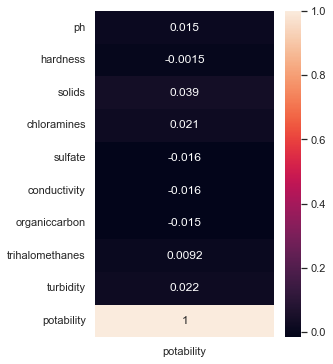

In [43]:
df["potability"] = df["potability"].astype("int64") # Convert back to numeric value
f, ax = plt.subplots(figsize=(4,6))
sns.heatmap(ax=ax, data=df.corr()[["potability"]][1:], annot=True)
plt.show()

Dapat dilihat pada heatmap di atas bahwa semua kolom nontarget memiliki nilai korelasi yang hampir nol dengan kolom target. Artinya, tidak ada kolom nontarget yang berkorelasi secara linear dengan kolom target.

Meski demikian, jika memang ingin menguji ketergantungan antara kolom target dan nontarget, dapat dilakukan tes lain. Misalnya tes independensi menggunakan distribusi Chi-Squared. 

### Scatter-plot antara kolom non-target dan kolom target

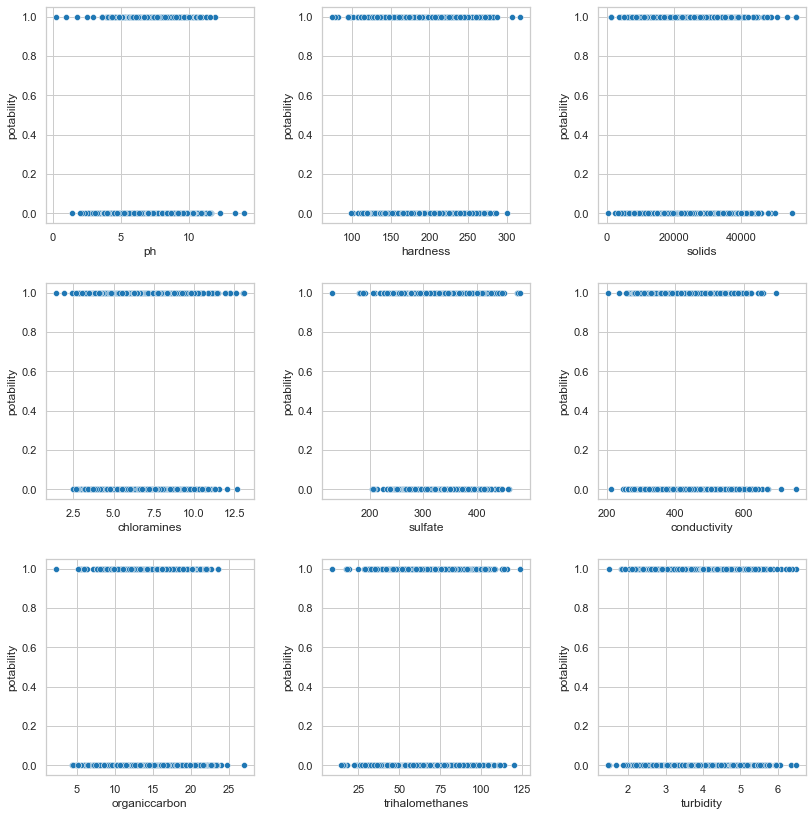

In [44]:
f, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
f.tight_layout(pad=3)

cols = df.columns[1:-1]
for i in range(3):
    for j in range(3):
        sns.scatterplot(ax=ax[i][j], x=df[cols[i*3+j]], y=df["potability"])

plt.show()